In [1]:
'''
多元线性回归实战练习
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

from numpy import genfromtxt

In [2]:
#读入数据
data = genfromtxt(r"Delivery.csv",delimiter=',')
#print(data)

In [3]:
#切分数据
x_data =data[:,:-1] 
y_data =data[:,-1]#训练数据
#print(x_data)
#print(y_data)

In [4]:
#学习率 learning rate
Ir = 0.0001
#参数
theta0=0
theta1 =0
theta2=0
#最大迭代次数
epochs =1000

#最小二乘法
def compute_error(theta0, theta1, theta2, x_data, y_data):
    totalError = 0
    for i in range(0,len(x_data)):
        totalError += (y_data[i] - (theta1 * x_data[i,0] + theta2 * x_data[i,1] + theta0)) ** 2
    return totalError/ float(len(x_data))

def gradient_descent_runner(x_data, y_data, theta0, theta1, theta2, Ir, epochs):
    m = float((len(x_data)))
    for i in range(epochs):
        theta0_grad = 0
        theta1_grad = 0
        theta2_grad = 0
        #计算梯度的总和在求平均
        for j in range(len(x_data)):
            theta0_grad +=  -(1/m) * (y_data[j] - (theta0 + theta1 * x_data[j,0] + theta2 * x_data[j,1])) 
            theta1_grad += -(1/m) * (y_data[j] -(theta0 + theta1 * x_data[j,0] + theta2 * x_data[j,1]))* x_data[j,0] 
            theta2_grad += -(1/m) * (y_data[j] - (theta0 + theta1 * x_data[j,0] + theta2 * x_data[j,1])) * x_data[j,1]
        theta0 = theta0 - (Ir * theta0_grad)
        theta1 = theta1 - (Ir * theta1_grad)
        theta2 = theta2 - (Ir * theta2_grad)
    return theta0, theta1, theta2

In [5]:
print ("Starting theta0 = {0}, theta1 = {1}, theta2 = {2}, error = {3}".format(theta0, theta1, theta2,
                                                                               compute_error(theta0, theta1, theta2, x_data, y_data)))
print("Running")
theta0, theta1, theta2 = gradient_descent_runner(x_data, y_data, theta0, theta1, theta2, Ir, epochs)

print("After {0} iterations theta0 = {1}, theta1 = {2}, theta2 = {3}, error = {4}".format(epochs,theta0, theta1, theta2, 
                                                                               compute_error(theta0, theta1, theta2, x_data, y_data)))

Starting theta0 = 0, theta1 = 0, theta2 = 0, error = 47.279999999999994
Running
After 1000 iterations theta0 = 0.006971416196678633, theta1 = 0.08021042690771771, theta2 = 0.07611036240566814, error = 0.7731271432218118


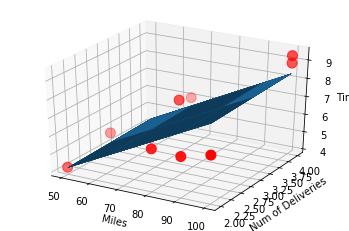

In [7]:
ax = plt.figure().add_subplot(111,projection = "3d")
ax.scatter(x_data[:,0],x_data[:,1], y_data, c='r', marker = 'o', s = 100)
x0 = x_data[:,0]
x1 = x_data[:,1]
#生成网格格式
x0, x1 = np.meshgrid(x0, x1)
z = theta0 + theta1 * x0 + theta2 * x1
ax.plot_surface(x0, x1, z)
ax.set_xlabel('Miles')
ax.set_ylabel('Num of Deliveries')
ax.set_zlabel('Time')

plt.show()